# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br/>
Штраф за опоздание: -1 балл за каждый день

Файл с дз надо загрузить по [ссылке](https://www.dropbox.com/request/fN13dbdM4Cz1no5bwyF9)<br/>
Постарайтесь назвать файл по следующему формату:** [ИАД-*{Номер}*] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br/>

Сопровождайте ваш код изображеними, комментариями и выводами. <br/>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [354]:
titanium = pd.read_csv('titanium.csv')
titanium.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [355]:
titanium['x'] = (titanium['x'] - titanium['x'].mean()) / titanium['x'].std()

In [356]:
titanium.head()

,x,y
0,-1.679650,0.644
1,-1.609665,0.622
2,-1.539679,0.638
3,-1.469694,0.649
4,-1.399708,0.652


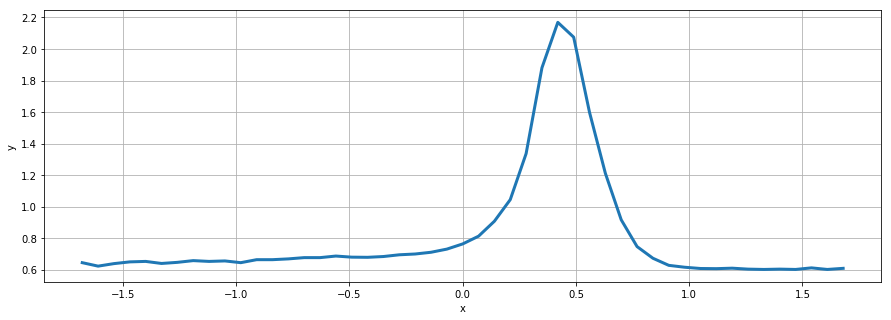

In [357]:
plt.figure(figsize=(15, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(titanium['x'], titanium['y'], lw=3)

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [358]:
X = titanium['x'].values.reshape((len(titanium['x']), 1))
y = titanium['y'].values.reshape((len(titanium['y']),))

In [359]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as MAE

### Линейное ядро

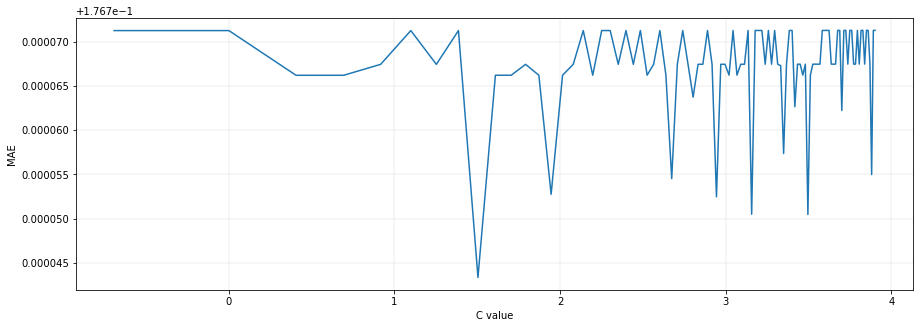

In [360]:
mae_lst = []
for c_value in np.arange(0.5, 50, 0.5):
    lin_svr = SVR(kernel='linear', epsilon=0.01, C = c_value)
    lin_svr.fit(X, y)
    y_predicted = lin_svr.predict(X)
    mae_lst.append(MAE(y, y_predicted))

plt.figure(figsize=(15, 5))
plt.xlabel('C value')
plt.ylabel('MAE')
plt.grid(lw=0.2)
plt.plot(np.log(np.arange(0.5, 50, 0.5)), mae_lst)

*Значения MAE близки к $0$ => модель переобучена.*

In [361]:
c_opt = np.arange(0.5, 50, 0.5)[mae_lst.index(min(mae_lst))] # выделяем оптимальное C через индекс минимальной MAE
c_opt

4.5

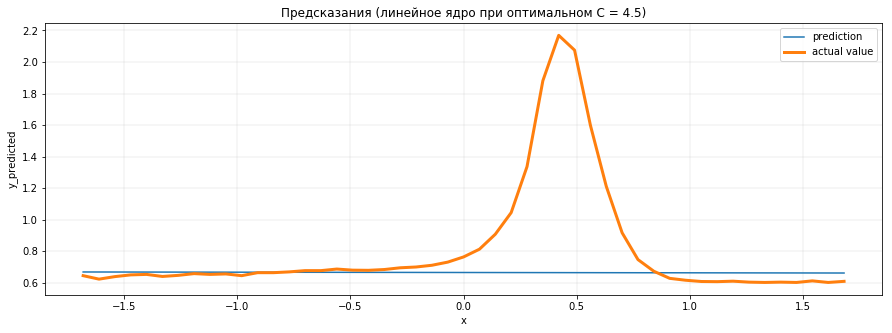

In [362]:
lin_svr = SVR(kernel='linear', epsilon=0.01, C = c_opt)
lin_svr.fit(X, y)
y_predicted = lin_svr.predict(X)

plt.figure(figsize=(15, 5))
plt.title('Предсказания (линейное ядро при оптимальном С = ' + str(c_opt) + ')')
plt.xlabel('x')
plt.ylabel('y_predicted')
plt.grid(lw=0.2)
plt.plot(X, y_predicted, label='prediction')
plt.plot(titanium['x'], titanium['y'], lw=3, label='actual value')
plt.legend()

### Полиномиальное ядро

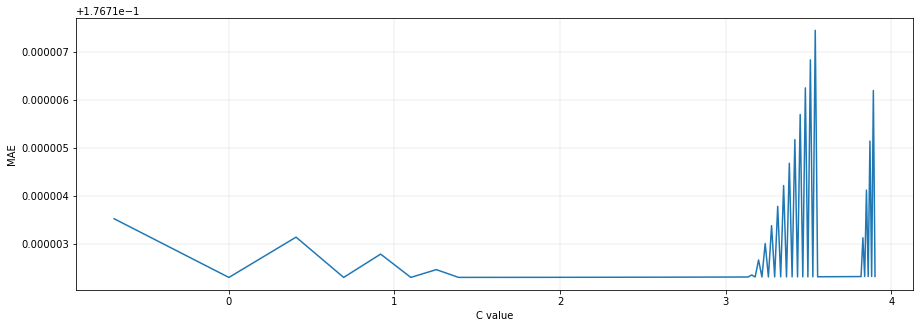

In [363]:
mae_lst = []
for c_value in np.arange(0.5, 50, 0.5):
    poly_svr = SVR(kernel='poly', epsilon=0.01, C = c_value)
    poly_svr.fit(X, y)
    y_predicted = poly_svr.predict(X)
    mae_lst.append(MAE(y, y_predicted))

plt.figure(figsize=(15, 5))
plt.xlabel('C value')
plt.ylabel('MAE')
plt.grid(lw=0.2)
plt.plot(np.log(np.arange(0.5, 50, 0.5)), mae_lst)

Значения MAE очень большие и растут с увеличением штрафа С => модель недообучена.

In [364]:
c_opt = np.arange(0.5, 50, 0.5)[mae_lst.index(min(mae_lst))] # выделяем оптимальное C через индекс минимальной MAE
c_opt

1.0

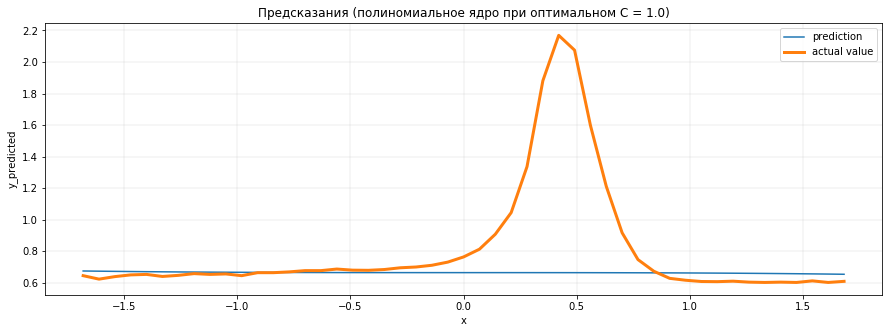

In [365]:
poly_svr = SVR(kernel='poly', epsilon=0.01, C = c_opt)
poly_svr.fit(X, y)
y_predicted = poly_svr.predict(X)

plt.figure(figsize=(15, 5))
plt.title('Предсказания (полиномиальное ядро при оптимальном С = ' + str(c_opt) + ')')
plt.xlabel('x')
plt.ylabel('y_predicted')
plt.grid(lw=0.2)
plt.plot(X, y_predicted, label='prediction')
plt.plot(titanium['x'], titanium['y'], lw=3, label='actual value')
plt.legend()

### RBF

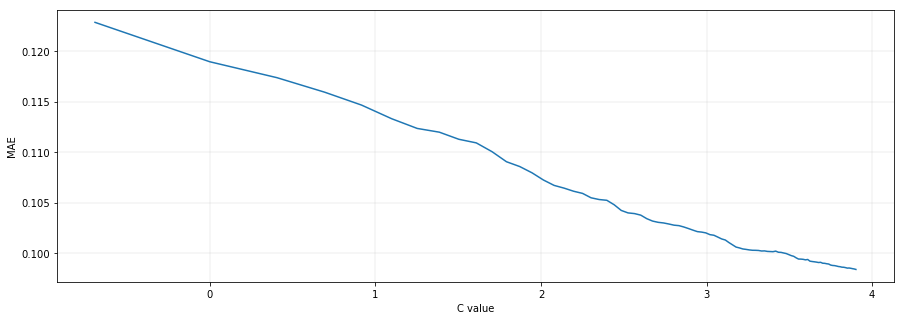

In [366]:
mae_lst = []
for c_value in np.arange(0.5, 50, 0.5):
    rbf_svr = SVR(kernel='rbf', epsilon=0.01, C = c_value)
    rbf_svr.fit(X, y)
    y_predicted = rbf_svr.predict(X)
    mae_lst.append(MAE(y, y_predicted))

plt.figure(figsize=(15, 5))
plt.xlabel('C value')
plt.ylabel('MAE')
plt.grid(lw=0.2)
plt.plot(np.log(np.arange(0.5, 50, 0.5)), mae_lst)

In [367]:
c_opt = np.arange(0.5, 50, 0.5)[mae_lst.index(min(mae_lst))] # выделяем оптимальное C через индекс минимальной MAE
c_opt

49.5

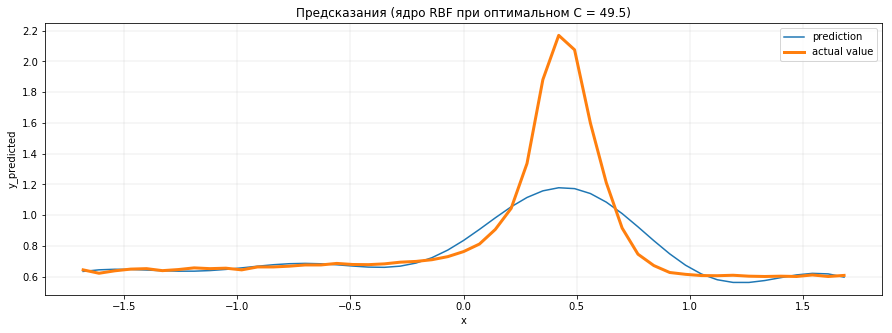

In [368]:
rbf_svr = SVR(kernel='rbf', epsilon=0.01, C = c_opt)
rbf_svr.fit(X, y)
y_predicted = rbf_svr.predict(X)

plt.figure(figsize=(15, 5))
plt.title('Предсказания (ядро RBF при оптимальном С = ' + str(c_opt) + ')')
plt.xlabel('x')
plt.ylabel('y_predicted')
plt.grid(lw=0.2)
plt.plot(X, y_predicted, label='prediction')
plt.plot(titanium['x'], titanium['y'], lw=3, label='actual value')
plt.legend()

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [17]:
wap_es = pd.read_csv('Desktop/ML_data/war_and_peace_es.txt', sep=" ", header=None, names=['word'])

wap_es.head()

,word
0,guerra
1,pace
2,lev
3,nicoevic
4,tolstj


In [18]:
wap_es['label'] = np.zeros((len(wap_es),), dtype=np.int) # 0 - кодировка испанского слова

In [19]:
wap_es.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


In [20]:
wap_en = pd.read_csv('Desktop/ML_data/war_and_peace_en.txt', sep=" ", names=['word'], header=None)
wap_en['label'] = np.ones((len(wap_en),), dtype=np.int) # 1 - кодировка английского слова
wap_en.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


In [21]:
df = wap_es.append(wap_en) 

df = df.reset_index(drop=True)

In [22]:
df.tail()

,word,label
11398,leave,1
11399,her,1
11400,task,1
11401,was,1
11402,accomplished,1


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [23]:
RND_SEED = 100

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df['word']
y = df['label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=RND_SEED)

In [27]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [28]:
n_min = 3 # минимальное число букв для ngram
n_max = 3 # максимальное число букв для ngram

In [29]:
lin_svc = SVC(kernel='linear')

pipeline = Pipeline([('countvect', CountVectorizer(analyzer='char', ngram_range=(n_min, n_max))), ('svc', lin_svc)])

In [30]:
ppln_clf = pipeline.fit(X_test, y_test)

In [31]:
acc_score = accuracy_score(ppln_clf.predict(X_test), y_test)
acc_score

0.9717198290036172

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
n_grams = [(i, i) for i in range(1, 4)]
Cs = np.arange(0.5, 50, 1)

In [34]:
params = {'countvect__ngram_range':n_grams, 'svc__C':Cs}

In [35]:
grdcv = GridSearchCV(Pipeline([('countvect', CountVectorizer(analyzer='char')),
                               ('svc', lin_svc)]), params, scoring='accuracy', n_jobs=-1)

In [36]:
grdcv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('countvect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'countvect__ngram_range': [(1, 1), (2, 2), (3, 3)], 'svc__C': array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5])},
      

In [37]:
grdcv.best_params_

{'countvect__ngram_range': (2, 2), 'svc__C': 3.5}

In [38]:
grdcv.best_score_

0.89035087719298245

In [39]:
grdcv.grid_scores_

/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75833, std: 0.00821, params: {'countvect__ngram_range': (1, 1), 'svc__C': 0.5},
 mean: 0.76842, std: 0.00468, params: {'countvect__ngram_range': (1, 1), 'svc__C': 1.5},
 mean: 0.76667, std: 0.00434, params: {'countvect__ngram_range': (1, 1), 'svc__C': 2.5},
 mean: 0.76579, std: 0.00492, params: {'countvect__ngram_range': (1, 1), 'svc__C': 3.5},
 mean: 0.76579, std: 0.00568, params: {'countvect__ngram_range': (1, 1), 'svc__C': 4.5},
 mean: 0.76491, std: 0.00508, params: {'countvect__ngram_range': (1, 1), 'svc__C': 5.5},
 mean: 0.76491, std: 0.00508, params: {'countvect__ngram_range': (1, 1), 'svc__C': 6.5},
 mean: 0.76491, std: 0.00508, params: {'countvect__ngram_range': (1, 1), 'svc__C': 7.5},
 mean: 0.76491, std: 0.00508, params: {'countvect__ngram_range': (1, 1), 'svc__C': 8.5},
 mean: 0.76491, std: 0.00508, params: {'countvect__ngram_range': (1, 1), 'svc__C': 9.5},
 mean: 0.76623, std: 0.00328, params: {'countvect__ngram_range': (1, 1), 'svc__C': 10.5},
 mean: 0.76491, std:

/Users/maxim_anisimov/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


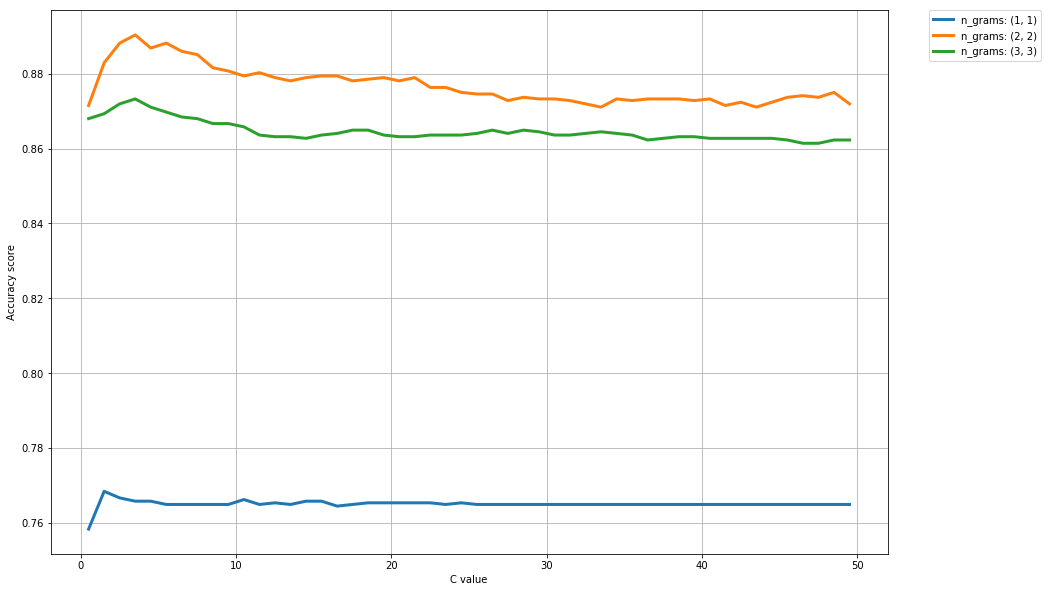

In [40]:
scores = [x[1] for x in grdcv.grid_scores_]
scores = np.array(scores).reshape(len(n_grams), len(Cs))

plt.figure(figsize=(15, 10))
plt.grid()
for ind, i in enumerate(n_grams):
    plt.plot(Cs, scores[ind], lw=3, label='n_grams: ' + str(i))
plt.legend()
plt.xlabel('C value')
plt.ylabel('Accuracy score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [310]:
RND_SEED = 100

In [311]:
df_shuffled = df

In [312]:
df_shuffled = df_shuffled.sample(1000) # возьмем и перемешаем только 1000 объектов из датасета
df_shuffled = df_shuffled.reset_index()
df_shuffled

,index,word,label
0,4714,sorrise,0
1,1518,meinen,0
2,2834,qualcosa,0
3,8896,spinning,1
4,10118,mans,1
5,8487,anna,1
6,9724,she,1
7,6998,refused,1
8,9656,the,1
9,6539,scherer,1


In [313]:
len(df_shuffled)

1000

In [314]:
X_train, X_test, y_train, y_test = train_test_split(df_shuffled['index'], df_shuffled['label'],
                                                    train_size=0.8, random_state = RND_SEED)

In [315]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [316]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [317]:
X_train = [item for sublist in X_train for item in sublist] # решаю проблему со списками
X_test = [item for sublist in X_test for item in sublist]

In [318]:
X_test

[2707,
 974,
 3021,
 1052,
 8446,
 1664,
 2801,
 2172,
 2867,
 8802,
 9159,
 2106,
 1772,
 7791,
 7359,
 10378,
 824,
 10742,
 2629,
 2108,
 7381,
 4885,
 1984,
 4278,
 7723,
 2289,
 3748,
 8949,
 5489,
 762,
 318,
 878,
 7813,
 10160,
 4606,
 9554,
 9761,
 1293,
 7687,
 10617,
 7120,
 1167,
 9448,
 6075,
 4713,
 10389,
 6171,
 7260,
 4423,
 1135,
 5669,
 4144,
 509,
 5576,
 9429,
 9844,
 7882,
 4186,
 90,
 6586,
 6718,
 7859,
 9239,
 2251,
 7076,
 5437,
 2748,
 3050,
 7665,
 9548,
 7317,
 8779,
 3517,
 6300,
 295,
 6468,
 10244,
 6239,
 6942,
 11263,
 4335,
 7263,
 466,
 11005,
 10726,
 4932,
 8660,
 5951,
 10423,
 3853,
 3968,
 6058,
 10991,
 2975,
 1857,
 4653,
 4055,
 1912,
 10155,
 4355,
 10151,
 8670,
 9207,
 4847,
 5091,
 2168,
 10012,
 10350,
 6553,
 6403,
 8812,
 3218,
 3610,
 444,
 10374,
 6133,
 241,
 10849,
 10944,
 7869,
 5342,
 1571,
 8777,
 3350,
 5293,
 3092,
 1490,
 3089,
 1142,
 6899,
 4259,
 6024,
 4766,
 8420,
 9291,
 7146,
 10844,
 7169,
 7000,
 10411,
 8170,
 1809

In [319]:
df['word'][X_train[1]] # проверка

'pensa'

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [320]:
from editdistance import eval

In [321]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
index    1000 non-null int64
word     1000 non-null object
label    1000 non-null int64
dtypes: int64(2), object(1)
memory usage: 23.5+ KB


In [322]:
def string_kernel(U, V):
    matrix = np.zeros((len(U), len(V))) # нулевая матрица
    for i in range(len(U)):
        for j in range(len(V)):
            distance = eval(df['word'][U[i]], df['word'][V[j]]) # замеряем расстояние между словами
            matrix[i, j] = np.exp(-np.linalg.norm(distance)**2) # преобразованное расстояние добавляем в матрицу
    return matrix 

In [323]:
string_kernel(X_train, X_train)

array([[  1.00000000e+00,   1.12535175e-07,   1.38879439e-11, ...,
          2.31952283e-16,   2.31952283e-16,   1.38879439e-11],
       [  1.12535175e-07,   1.00000000e+00,   1.23409804e-04, ...,
          1.38879439e-11,   1.38879439e-11,   1.12535175e-07],
       [  1.38879439e-11,   1.23409804e-04,   1.00000000e+00, ...,
          1.12535175e-07,   1.23409804e-04,   1.23409804e-04],
       ..., 
       [  2.31952283e-16,   1.38879439e-11,   1.12535175e-07, ...,
          1.00000000e+00,   1.38879439e-11,   1.38879439e-11],
       [  2.31952283e-16,   1.38879439e-11,   1.23409804e-04, ...,
          1.38879439e-11,   1.00000000e+00,   1.23409804e-04],
       [  1.38879439e-11,   1.12535175e-07,   1.23409804e-04, ...,
          1.38879439e-11,   1.23409804e-04,   1.00000000e+00]])

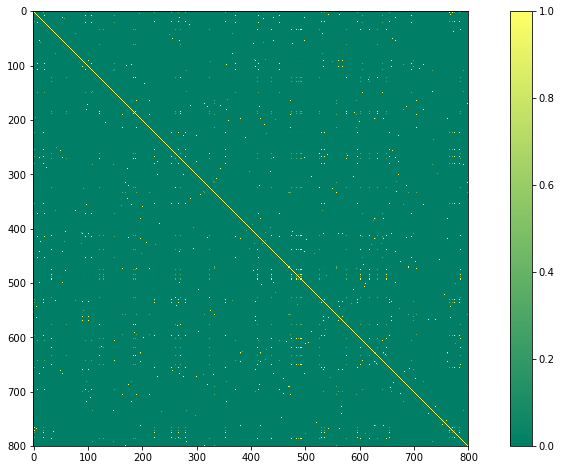

In [369]:
fig, ax = plt.subplots(figsize=(15, 8))
vis = plt.imshow(string_kernel(X_train, X_train), cmap='summer')
fig.colorbar(vis)

*На графике получаем матрицу, на главной диагонали которой стоят расстояния между словом и таким же словом (они равны 1, что является максимумом), что объясняет желтый цвет диагональной прямой.*

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [329]:
Cs = np.arange(1, 100, 10)

for c_value in Cs: # пробегаемся по списку значений С
    svc = SVC(kernel='precomputed', C=c_value)
    svc.fit(string_kernel(X_train, X_train), y_train)
    y_predictions_train = svc.predict(string_kernel(X_train, X_train)) # предсказания y обучающей выборки
    y_predictions_test = svc.predict(string_kernel(X_test, X_train)) # предсказания y тестовой выборки
    print('C =', c_value)
    print('Train accuracy score =', accuracy_score(y_predictions_train, y_train))
    print('Test accuracy_score =', accuracy_score(y_predictions_test, y_test))
    print('---------------------')

C = 1
Train accuracy score = 0.99625
Test accuracy_score = 0.83
---------------------
C = 11
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 21
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 31
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 41
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 51
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 61
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 71
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 81
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------
C = 91
Train accuracy score = 0.99625
Test accuracy_score = 0.835
---------------------


*В итоге мы получаем самое высокое качество 0.835 на тестовой выборке, которое дают С от 11 до 91 (можно предположить, что С из этого отрезка, не использованные при обучении, дадут такое же качество).*